### 窗口创建与销毁

In [1]:
# opencv名字叫做opencv但是导包的时候，叫做cv2
import cv2

In [2]:
# python函数编码规范，单词首字母小写，单词与单词之间用下划线连接，wait_key
# 创建窗口
# cv2.WINDOW_AUTOSIZE不允许修改窗口大小
cv2.namedWindow('window',cv2.WINDOW_NORMAL)

# 更改窗口的大小
cv2.resizeWindow('window',800,600)
# 展示名字为window的窗口
cv2.imshow('window',0)

# 等待按键
# waitKey会返回按键的ascii的值
# 0表示接受任意按键 如果给其它整数 表示按键等待的时间 单位是ms
# 可以使用waitKey来销毁窗口，不用每次重启python
key = cv2.waitKey(0)
# key是int型 最少都是16位 但是ascii是8位
if key & 0xFF == ord('q'):
    print('准备销毁窗口')
    cv2.destroyAllWindows()

In [3]:
# 怎么计算q的ascii
# ord是python中计算ascii的值得函数
ord('q')

113

### 读取图片

In [4]:
import matplotlib.pyplot as plt

In [5]:
 # 默认是按照彩色图片来读取的
cat = cv2.imread('./lion.jpg')

# numpy的narray
# cat

In [6]:
cat.max()

255

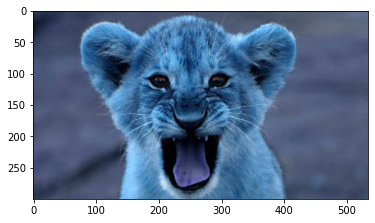

In [7]:
# matplotlib显示图片颜色和真实的不同，因为opencv读进来图片的通道不是默认的RGB
# 而是BGR,所以opencv读进来的图片不要用别的方式展示如matploilib
# 用opencv自己的方式展示没问题
plt.imshow(cat)

In [8]:
cv2.imshow('lion',cat)
key = cv2.waitKey(0)
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [9]:
# 把显示图片的方法封装成一个函数方便显示图片
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    if key & 0xFF == ord('q'):
        cv2.destroyAllWindows()

In [10]:
# 从外部py文件导入
from utils import cv_show

In [11]:
# 必须执行外部文件
# tab和空格混用的缩进问题
%run utils.py

In [12]:
# cat = cv2.imread('./lion.jpg')
cv_show('cat',cat)

In [13]:
import cv2


# 创建窗口
cv2.namedWindow('img',cv2.WINDOW_NORMAL)
cv2.resizeWindow('img',534,300)
# 这里的图片的大小与窗口大小比例一致，可以显示正常比例图片
# 读取图片
img = cv2.imread('./lion.jpg')


while True:
    cv2.imshow('img',img)
    key = cv2.waitKey(0)
    
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite('./123.jpg',img)
    else:
        print(key)
        
cv2.destroyAllWindows()

13
-1


In [2]:
# 打开摄像头
import cv2


cv2.namedWindow('video',cv2.WINDOW_NORMAL)
cv2.resizeWindow('video',640,360)

# 如果打开失败，不会报错 0表示序号为0的摄像头
# cap = cv2.VideoCapture(1)
# 打开视频 输入视频的地址
cap = cv2.VideoCapture('./sherlock.mp4')

# 循环读取摄像头的每一帧
# while True:
while cap.isOpened():
    # 读一帧数据，返回标记和这一帧数据，True表示读到了数据，False表示没读到数据
    ret, frame = cap.read()
    
    # 可以根据ret做判断
    if not ret:
        # 没读到数据直接退出
        break
        
    # 显示数据
    cv2.imshow('video', frame)
    
    # 假如一个视频是30帧的 那么每张图之间间隔是多少秒
    # 只能是整数
    key = cv2.waitKey(1000 // 30)
    if key & 0xFF == ord('q'):
        break

# 释放资源
cap.release()
cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture(0)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# avi格式的视频
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# 创建videowriter 相机分辨率640*480
# vw = cv2.VideoWriter('output.mp4',fourcc,30,(640,480))
vw = cv2.VideoWriter('output.avi',fourcc,30,(640,480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    # 写每一帧数据
    vw.write(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1000 // 30) == ord('q'):
        break
        
# 释放资源
cap.release()
vw.release()
cv2.destroyAllWindows()

* EVENT_FLAG_LBUTTON 1         #左鍵拖曳  
* EVENT_FLAG_RBUTTON 2         #右鍵拖曳  
* EVENT_FLAG_MBUTTON 4         #中鍵拖曳  
* EVENT_FLAG_CTRLKEY 8         #(8-15)按Ctrl不放事件 
* EVENT_FLAG_SHIFTKEY 16       #(16-31)按Shift不放事件 
* EVENT_FLAG_ALTKEY 32         #(32-39)按Alt不放事件  


* EVENT_MOUSEMOVE 0           #鼠标移动
* EVENT_LBUTTONDOWN 1          #左键点击
* EVENT_RBUTTONDOWN 2          #右键点击
* EVENT_MBUTTONDOWN 3          #中键点击
* EVENT_LBUTTONUP 4           #左键放开
* EVENT_RBUTTONUP 5           #右键放开
* EVENT_MBUTTONUP 6           #中键放开
* EVENT_LBUTTONDBLCLK 7        #左键双击
* EVENT_RBUTTONDBLCLK 8        #右键双击
* EVENT_MBUTTONDBLCLK 9        #中键双击
* EVENT_MOUSEWHEEL 10         #鼠标滚轮上下滚动
* EVENT_MOUSEHWHEEL 11         #鼠标滚轮左右滚动

In [14]:
# opencv控制鼠标
import cv2
import numpy as np

# 函数名任意，必须五个参数
# event表示鼠标事件，x,y是鼠标坐标
# flags鼠标的组合键
def mouse_callback(event,x,y,flags,userdata):
    print(event,x,y,flags,userdata)
    # 按下鼠标右键退出
    if event == 2:
        cv2.destroyAllWindows()
    
# 创建窗口
cv2.namedWindow('mouse',cv2.WINDOW_NORMAL)
cv2.resizeWindow('mouse',640,360)

# 设置鼠标回调函数
cv2.setMouseCallback('mouse',mouse_callback,'123')

# 生成全黑的图片
img=np.zeros((360,640,3),np.uint8)
while True:
    cv2.imshow('mouse',img)
    if cv2.waitKey(1000) == ord('q'):
        break
        
cv2.destroyAllWindows()

0 6 221 0 123
0 19 224 0 123
0 36 227 0 123
0 59 232 0 123
0 70 234 0 123
0 89 238 0 123
0 102 243 0 123
0 109 246 0 123
0 112 247 0 123
0 115 249 0 123
0 125 253 0 123
0 129 255 0 123
0 135 257 0 123
0 142 258 0 123
0 145 258 0 123
0 148 258 0 123
0 152 258 0 123
0 156 258 0 123
0 166 258 0 123
0 181 258 0 123
0 201 258 0 123
0 222 257 0 123
0 237 253 0 123
0 248 249 0 123
0 252 248 0 123
0 254 246 0 123
0 256 245 0 123
0 259 242 0 123
0 262 236 0 123
0 265 228 0 123
0 267 223 0 123
0 268 219 0 123
0 268 218 0 123
0 268 216 0 123
0 264 224 0 123
0 257 238 0 123
0 248 251 0 123
0 237 263 0 123
0 223 274 0 123
0 213 282 0 123
0 213 282 0 123
0 208 283 0 123
0 206 285 0 123
0 205 285 0 123
0 203 284 0 123
0 200 282 0 123
0 196 278 0 123
0 182 271 0 123
0 174 268 0 123
0 165 263 0 123
0 158 260 0 123
0 151 257 0 123
0 143 253 0 123
0 139 248 0 123
0 137 241 0 123
0 134 232 0 123
0 132 221 0 123
0 130 211 0 123
0 128 201 0 123
0 128 201 0 123
0 127 196 0 123
0 127 189 0 123
0 127 185 0 123

In [19]:
# trackbar的使用
import cv2
import numpy as np

# 创建窗口
cv2.namedWindow('trackbar', cv2.WINDOW_NORMAL)
cv2.resizeWindow('tracebar', 640, 480)

# 定义回调函数
def callback(value):
    print(value)
    
# 创建3个trackbar
cv2.createTrackbar('R', 'trackbar', 0, 255, callback)
cv2.createTrackbar('G', 'trackbar', 0, 255, callback)
cv2.createTrackbar('B', 'trackbar', 0, 255, callback)

# 创建背景图片
img = np.zeros((480,640,3),np.uint8)

while True:
    # 获取当前trackbar的值
    r = cv2.getTrackbarPos('R','trackbar')
    g = cv2.getTrackbarPos('G','trackbar')
    b = cv2.getTrackbarPos('B','trackbar')
    
    # 用获取到的三个值修改背景图片颜色
    img[:] = [b, g, r]
    cv2.imshow('trackbar',img)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()

51
102
153
204
255
51
102
153
204
153
102
51
102
153
102
153
204
153
102
51
102
51
50
49
48
47
46
45
43
42
40
39
38
37
36
35
34
33
32
33
34
35
36
37
38
39
40
41
42
43
44
45
47
49
51
54
59
61
63
64
66
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
103
105
109
111
119
121
124
126
131
134
136
141
143
144
146
147
148
149
151
152
153
154
155
160
161
163
164
165
166
167
169
173
177
179
183
184
186
187
192
194
196
199
201
203
205
207
211
214
216
218
223
226
228
229
231
232
234
235
239
240
241
243
244
245
246
247
248
249
248
247
245
244
240
235
229
222
214
210
207
203
200
196
193
189
186
182
179
176
173
171
168
165
161
157
150
143
137
131
126
124
121
118
116
113
110
107
103
100
98
95
93
91
89
87
84
82
80
78
74
72
67
62
59
55
51
49
48
47
46
45
46
254
253
252
251
250
249
248
247
246
245
244
243
242
241
239
237
235
234
233
231
230
228
225
224
223
222
221
220
219
220
221
222
223
224
225
226
227
228
227
226
225
224
222
221
219
218
215
212
208
203
197
191
173
163
152
143
134
120
114
108
103
100
97
91


In [7]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
# 使用OpenCV绘制小白兔
import cv2
import numpy as np


# 创建名为 img的窗口
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('img', 640, 640)
# 创建纯白色的背景
img = np.full((640, 640, 3), fill_value = 255, dtype = np.uint8)
# 绘制20像素为单位的方格
for i in range(32):
    cv2.line(img, (0, i*20), (640, i*20), (128, 128, 128), 1, 4)
for i in range(32):
    cv2.line(img, (i*20, 0), (i*20, 640), (128, 128, 128), 1, 4)

# basic point
x = 320
y = 440
# left eye
cv2.circle(img, (x - 76, y - 114), 30, (0, 0, 0), 6, 16)
cv2.circle(img, (x - 76, y - 114), 8, (0, 0, 0), 20, 16)
# right eye
cv2.circle(img, (x + 76, y - 114), 30, (0, 0, 0), 6, 16)
cv2.circle(img, (x + 76, y - 114), 8, (0, 0, 0), 20, 16)
# nose
pts = np.array([(x - 40, y - 50), (x + 40, y - 50), (x + 0, y)], np.int32)
cv2.fillPoly(img, [pts], (93, 44, 239))
cv2.polylines(img, [pts], True, (0, 0, 0), 6, 16)
# month
cv2.ellipse(img, (x - 40, y - 0), (40, 30), 0, 0, 180,[0, 0, 0], 5, 16)
cv2.ellipse(img, (x + 40, y - 0), (40, 30), 0, 0, 180,[0, 0, 0], 5, 16)
# left ear
cv2.ellipse(img, (x - 80, y - 300), (120, 50), 90, 50, 290, [0, 0, 0], 5, 16)
cv2.ellipse(img, (x - 80, y - 300), (60, 14), 90, 40, 310, [172, 145, 240], 30, 16)
# right ear
cv2.ellipse(img, (x + 80, y - 300), (120, 50), 90, 70, 310, [0, 0, 0], 5, 16)
cv2.ellipse(img, (x + 80, y - 300), (60, 14), 90, 50, 320, [172, 145, 240], 30, 16)
# left beard
cv2.line(img, (x - 160, y - 80), (x - 240, y - 96), (0, 0, 0), 5, 16 )
cv2.line(img, (x - 160, y - 50), (x - 250, y - 50), (0, 0, 0), 5, 16 )
cv2.line(img, (x - 160, y - 20), (x - 240, y - 4), (0, 0, 0), 5, 16 )
# right beard
cv2.line(img, (x + 160, y - 80), (x + 240, y - 96), (0, 0, 0), 5, 16 )
cv2.line(img, (x + 160, y - 50), (x + 250, y - 50), (0, 0, 0), 5, 16 )
cv2.line(img, (x + 160, y - 20), (x + 240, y - 4), (0, 0, 0), 5, 16 )
# head
cv2.circle(img, (x + 0, y - 70), 190, (0, 0, 0), 8, 16)

# 展示图片
cv2.imshow('img',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
import cv2
import numpy as np


# 创建窗口
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('img', 640, 640)
# 创建纯白色的背景图
img = np.full((640, 640, 3), fill_value = 255, dtype = np.uint8)

# 绘制20像素为单位的方格
# for i in range(32):
#     cv2.line(img, (0, i*20), (640, i*20), (128, 128, 128), 1, 4)
# for i in range(32):
#     cv2.line(img, (i*20, 0), (i*20, 640), (128, 128, 128), 1, 4)    

# basic point
x = 320
y = 440

# left eye
cv2.circle(img, (x - 76, y - 114), 30, (0, 0, 0), 6, 16)
cv2.circle(img, (x - 76, y - 114), 8, (0, 0, 0), 20, 16)
# right eye
cv2.circle(img, (x + 76, y - 114), 30, (0, 0, 0), 6, 16)
cv2.circle(img, (x + 76, y - 114), 8, (0, 0, 0), 20, 16)
# nose
pts = np.array([(x - 40, y - 50), (x + 40, y - 50), (x + 0, y)], np.int32)
cv2.fillPoly(img, [pts], (93, 44, 239))
cv2.polylines(img, [pts], True, (0, 0, 0), 6, 16)
# month
cv2.ellipse(img, (x - 40, y - 0), (40, 30), 0, 0, 180,[0, 0, 0], 5, 16)
cv2.ellipse(img, (x + 40, y - 0), (40, 30), 0, 0, 180,[0, 0, 0], 5, 16)
# left ear
cv2.ellipse(img, (x - 80, y - 300), (120, 50), 90, 50, 290, [0, 0, 0], 5, 16)
cv2.ellipse(img, (x - 80, y - 300), (60, 14), 90, 40, 310, [172, 145, 240], 30, 16)
# right ear
cv2.ellipse(img, (x + 80, y - 300), (120, 50), 90, 70, 310, [0, 0, 0], 5, 16)
cv2.ellipse(img, (x + 80, y - 300), (60, 14), 90, 50, 320, [172, 145, 240], 30, 16)
# left beard
cv2.line(img, (x - 160, y - 80), (x - 240, y - 96), (0, 0, 0), 5, 16 )
cv2.line(img, (x - 160, y - 50), (x - 250, y - 50), (0, 0, 0), 5, 16 )
cv2.line(img, (x - 160, y - 20), (x - 240, y - 4), (0, 0, 0), 5, 16 )
# right beard
cv2.line(img, (x + 160, y - 80), (x + 240, y - 96), (0, 0, 0), 5, 16 )
cv2.line(img, (x + 160, y - 50), (x + 250, y - 50), (0, 0, 0), 5, 16 )
cv2.line(img, (x + 160, y - 20), (x + 240, y - 4), (0, 0, 0), 5, 16 )
# head
cv2.circle(img, (x + 0, y - 70), 190, (0, 0, 0), 8, 16)

# 展示图片
cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()